In [32]:
import torch
import math

NB_PATHS = 50
NB_TIMESTEPS = 100
T = 1.0
EPS = 0.001

dt = T / NB_TIMESTEPS
sigma = math.sqrt(-math.log(EPS) / T)  # alpha_t = eps
X = torch.zeros((NB_TIMESTEPS, NB_PATHS))
Z = torch.normal(0, 1, size=(NB_TIMESTEPS - 1, NB_PATHS))


def forward_diffusion_step(
    X: torch.Tensor,
    Z: torch.Tensor,
    sigma: float,
    dt: float,
) -> torch.Tensor:
    return X - 0.5 * sigma * sigma * X * dt + sigma * Z * math.sqrt(dt)


def backward_diffusion_step(
    X: torch.Tensor,
    Z: torch.Tensor,
    sigma: float,
    mu0: float,
    sigma0: float,
    t: float,
    dt: float,
) -> torch.Tensor:
    sigma2 = sigma * sigma
    alpha = math.exp(-sigma2 * (1 - t))
    score = -(X - mu0 * math.sqrt(alpha)) / (sigma0 * alpha + 1 - alpha)
    return (
        X
        + 0.5 * sigma2 * X * dt
        + score * sigma2 * dt
        + sigma * Z * math.sqrt(dt)
    )

Text(0.5, 1.0, 'Forward diffusion : N(10,0.1) to N(0,1)')

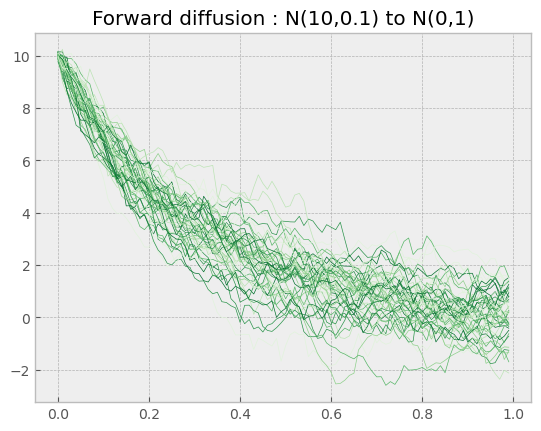

In [35]:
X0 = torch.normal(10, 0.1, size=(NB_PATHS,))
X[0] = X0
t = 0
ts = [0]
for i in range(NB_TIMESTEPS - 1):
    t = t + dt
    ts.append(t)
    X[i + 1] = forward_diffusion_step(X[i], Z[i], sigma, dt)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
sns.set_palette('Greens')

for i in range(len(X)):
    if i < 50:
        plt.plot(ts, X.T[i], lw=0.5)
plt.title("Forward diffusion : N(10,0.1) to N(0,1)")

Text(0.5, 1.0, 'Backward diffusion : N(0,1) to N(10,0.1)')

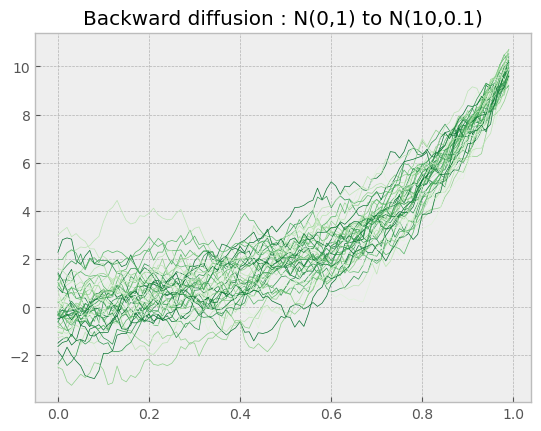

In [30]:
X0 = torch.normal(0, 1, size=(NB_PATHS,))
X[0] = X0
t = 0
ts = [0]
for i in range(NB_TIMESTEPS - 1):
    t = t + dt
    ts.append(t)
    X[i + 1] = backward_diffusion_step(X[i], Z[i], sigma, 10, 0.1, t, dt)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
sns.set_palette('Greens')

for i in range(len(X)):
    if i < 50:
        plt.plot(ts, X.T[i], lw=0.5)
plt.title("Backward diffusion : N(0,1) to N(10,0.1)")